In [11]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from statsmodels.iolib.table import SimpleTable
from sklearn.metrics import r2_score
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt
from scipy.stats import boxcox

autoreg_data = pd.read_excel("monthly-us-auto-registration-tho.xlsx")#, parse_dates=['Month'],keep_default_na=True)
dowjones_data = pd.read_csv("weekly-closings-of-the-dowjones-.csv")#,parse_dates=['Week'],keep_default_na=True)

def plot_ts_and_points(ts, start_point, step):
    new_series = [None for i in range(len(ts))]
    for i in range(len(ts)):
        pos = start_point + step * i
        if pos >= len(ts):
            break
        new_series[pos] = ts[pos]
    new_series = pd.Series(new_series)
    
    with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        ts_ax = plt.axes()
        ts.plot(ax=ts_ax, color='blue')
        new_series.plot(ax=ts_ax, style='ro')

        
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    
    
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

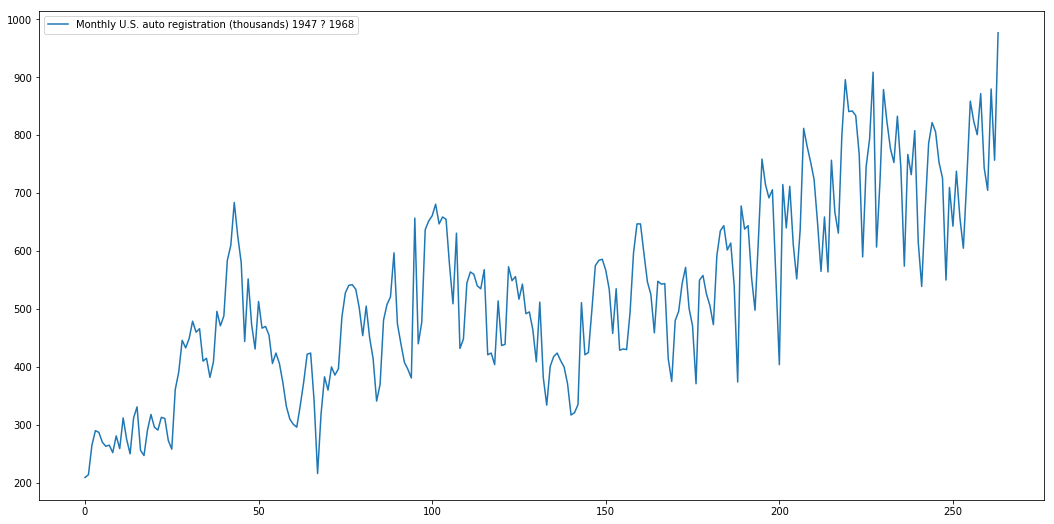

In [2]:
autoreg_data.plot(figsize=(18,9))

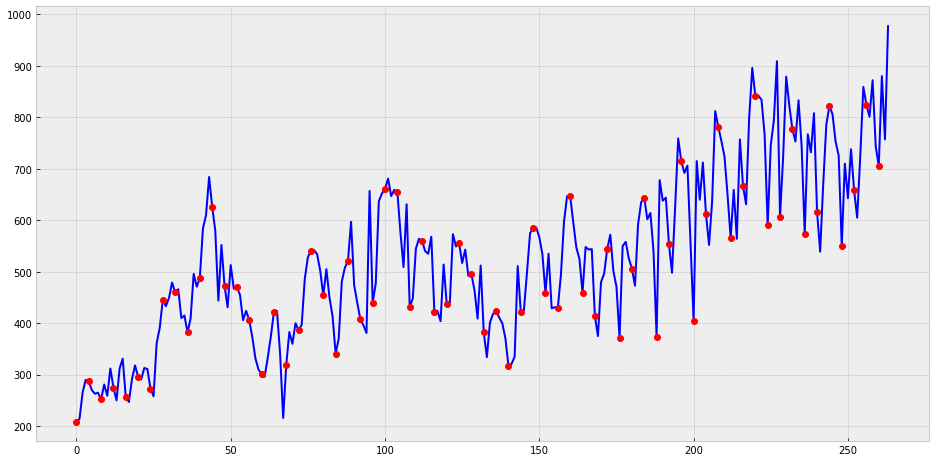

In [3]:
plot_ts_and_points(autoreg_data['Monthly U.S. auto registration (thousands) 1947 ? 1968'], 0, 4)

,Monthly U.S. auto registration (thousands) 1947 ? 1968
count,264.000000
mean,527.712121
std,162.997237
min,209.000000
25%,409.750000
50%,515.500000
75%,640.750000
max,977.000000


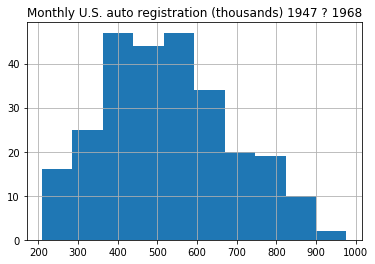

In [45]:
autoreg_data_d = autoreg_data.describe()
autoreg_data.hist()
autoreg_data_d

График имеет ярко выраженный тренд роста и признаки сезонности, что говорит о нестационарности ряда. Посмотрим на график автокорреляции

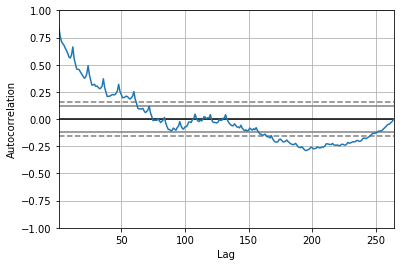

In [8]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(autoreg_data['Monthly U.S. auto registration (thousands) 1947 ? 1968'])
plt.show()

График уверенно движется вниз, что подтверждает гипотезу о нестационарности ряда

Results of Dickey-Fuller Test:
Test Statistic                  -1.225039
p-value                          0.662733
#Lags Used                      15.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


C:\Users\korpachev\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


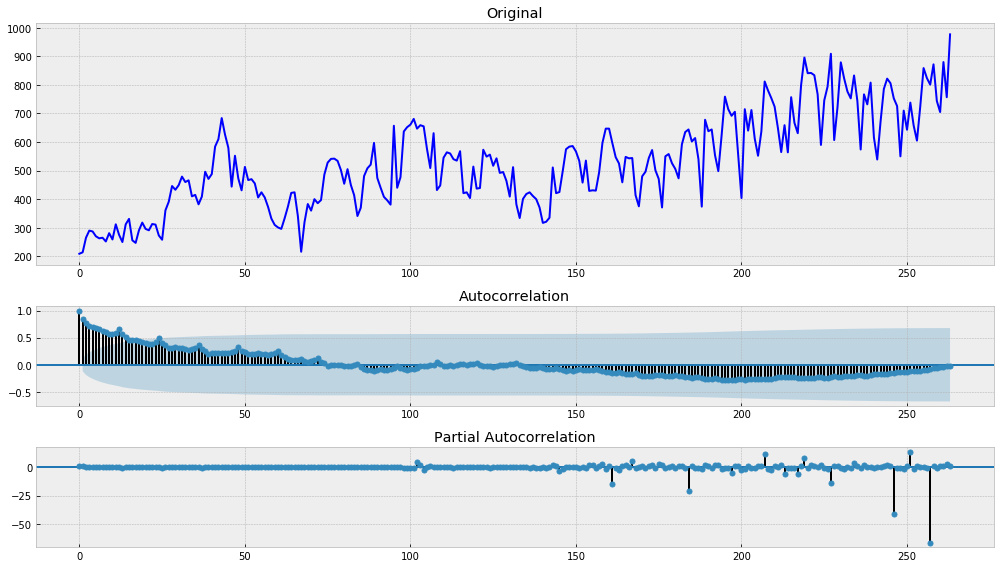

In [12]:
tsplot(autoreg_data['Monthly U.S. auto registration (thousands) 1947 ? 1968'])

Поведение ряда на графиках имеет признаки нестационарности. P-value также достаточно высокий для подтверждения гипотезы о нестационарности. Проведем дифференцирование и уменьшим дисперсию ряда

Results of Dickey-Fuller Test:
Test Statistic                  -1.941628
p-value                          0.312738
#Lags Used                      14.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


C:\Users\korpachev\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


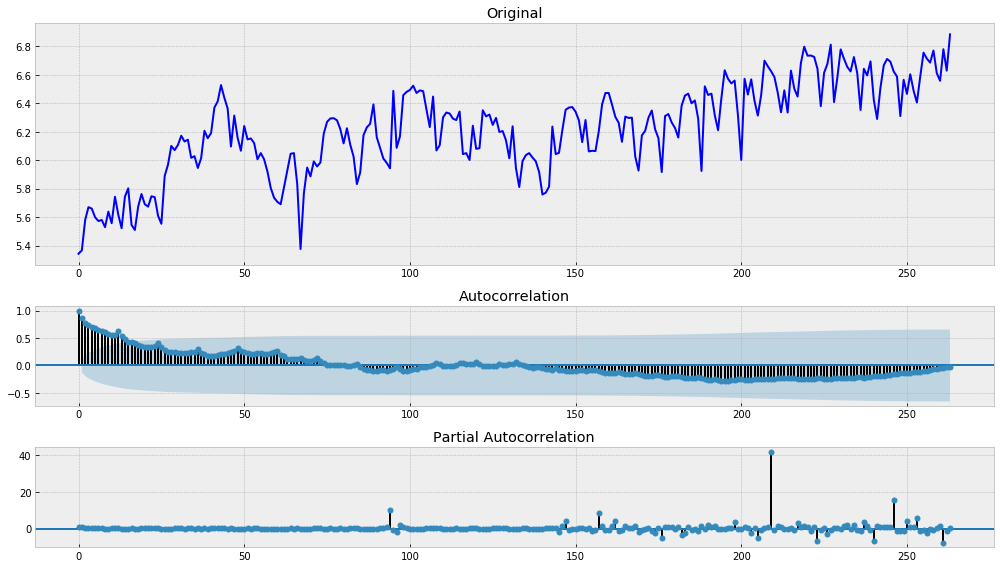

In [24]:
autoreg_data_disp = boxcox(autoreg_data['Monthly U.S. auto registration (thousands) 1947 ? 1968'], 0)
tsplot(autoreg_data_disp)

Results of Dickey-Fuller Test:
Test Statistic                  -4.362471
p-value                          0.000346
#Lags Used                      14.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


C:\Users\korpachev\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


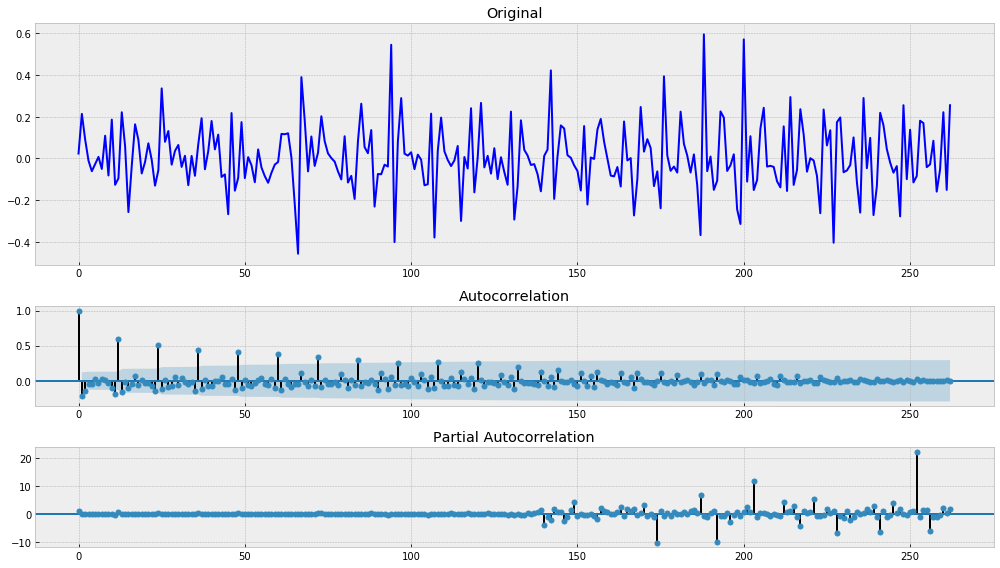

In [25]:
autoreg_data_disp_dif = autoreg_data_disp[1:] - autoreg_data_disp[:-1]
tsplot(autoreg_data_disp_dif)

p-value достаточно низкий для опровержения гипотезы о нестационарности ряда


# График №2

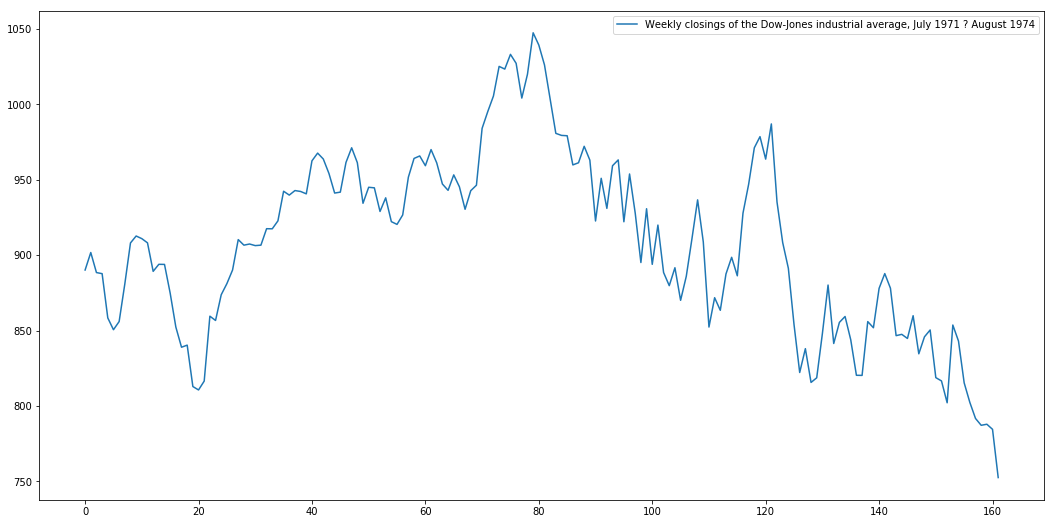

In [25]:
dowjones_data.plot(figsize=(18,9))

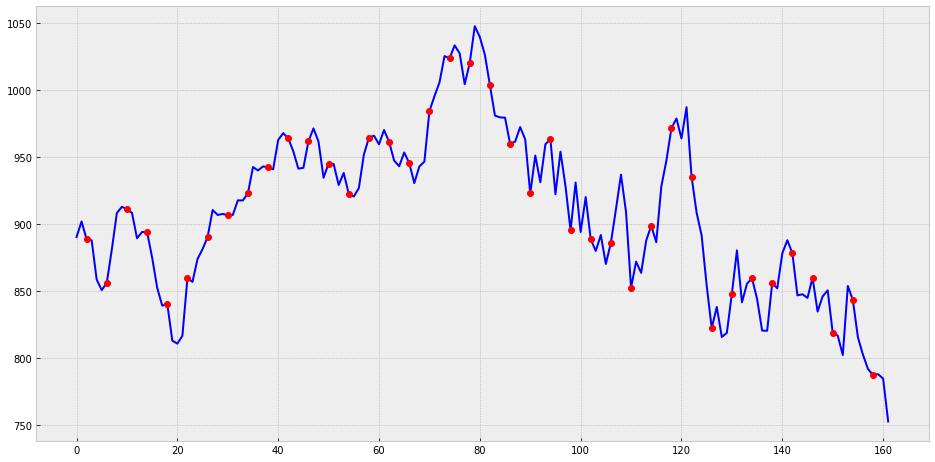

In [43]:
plot_ts_and_points(dowjones_data[dowjones_data.columns[1]], 2, 4)

,"Weekly closings of the Dow-Jones industrial average, July 1971 ? August 1974"
count,162.000000
mean,907.484753
std,60.599919
min,752.580000
25%,857.170000
50%,908.645000
75%,951.572500
max,1047.490000


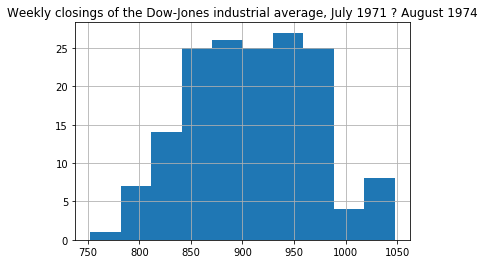

In [44]:
dowjones_data_d = dowjones_data.describe()
dowjones_data.hist()
dowjones_data_d

График не имеет ярко выраженных признаков сезонности или тренда. Гипотеза о стационарности ряда подлежит проверке. Посмотрим на график автокорреляции

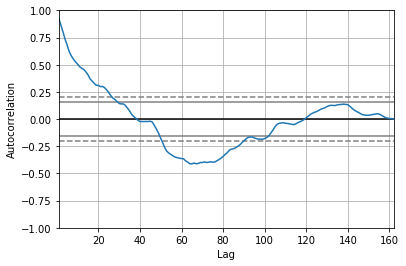

In [7]:
autocorrelation_plot(dowjones_data[dowjones_data.columns[1]])
plt.show()

График движется вниз по синусоиде. +1 к гипотезе о стационарности ряда

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


C:\Users\korpachev\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


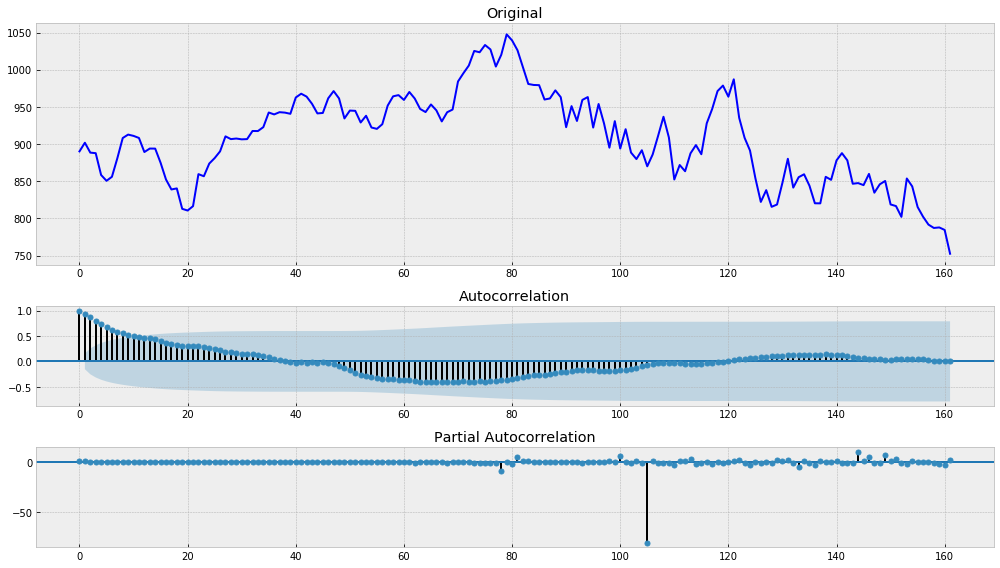

In [13]:
tsplot(dowjones_data[dowjones_data.columns[1]])

Поведение ряда на графиках имеет признаки стационарности. P-value же достаточно высокий для подтверждения гипотезы о стационарности. Проведем дифференцирование и уменьшим дисперсию ряда

Results of Dickey-Fuller Test:
Test Statistic                  -1.941628
p-value                          0.312738
#Lags Used                      14.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


C:\Users\korpachev\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


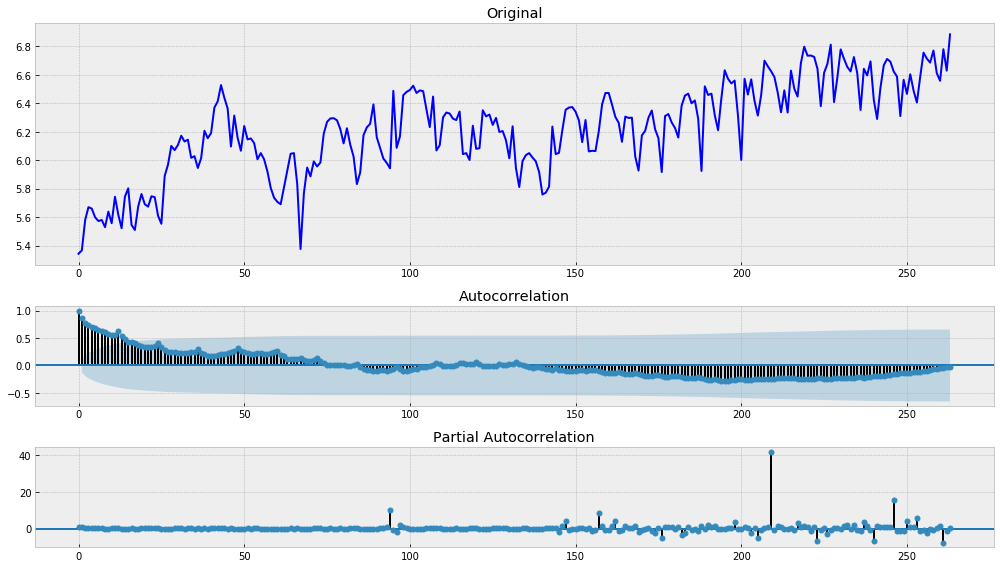

In [27]:
dowjones_data_disp = boxcox(dowjones_data[dowjones_data.columns[1]], 0)
tsplot(autoreg_data_disp)

Results of Dickey-Fuller Test:
Test Statistic                -1.299582e+01
p-value                        2.751609e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


C:\Users\korpachev\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


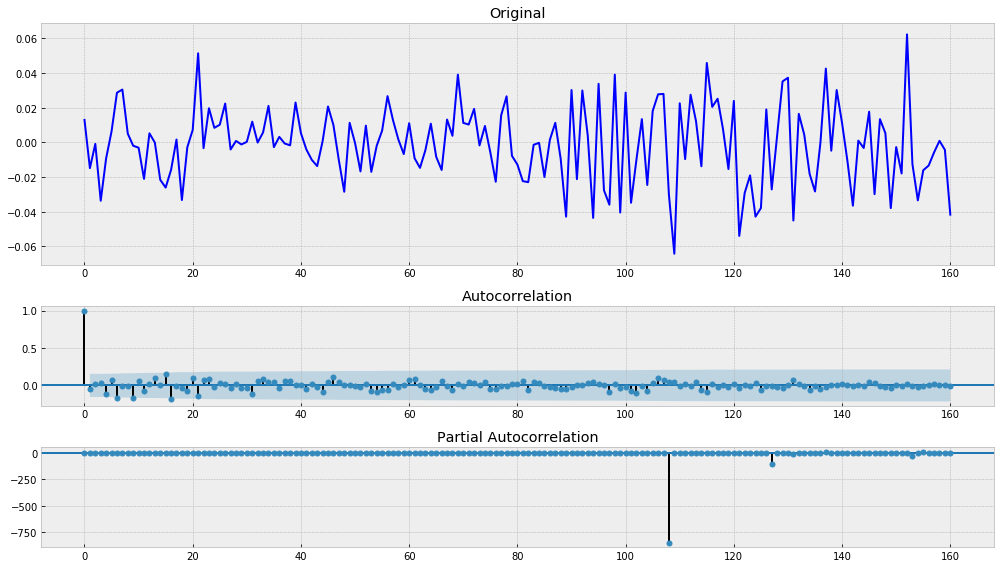

In [31]:
autoreg_data_disp_dif = dowjones_data_disp[1:] - dowjones_data_disp[:-1]
tsplot(autoreg_data_disp_dif)

p-value достаточно низкий для опровержения гипотезы о нестационарности ряда